In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [34]:
data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [3]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [26]:
#2.5
#vis_data.state.value_counts().index[0]
result=vis_data['state'].fillna(vis_data.state.value_counts().index[0])
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [27]:
#2.6
data.dropna()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


In [21]:
#2.8
scaler = StandardScaler()

a=vis_data['balance_due'].values
#np.reshape(a,(250306,1))
scaler.fit_transform(np.reshape(a,(250306,1))).min()

-13.147334652567258

In [33]:
#2.10
a=np.sqrt(vis_data['balance_due'][vis_data.balance_due>0])
a.median()-a.mean()

0.4525960609393067

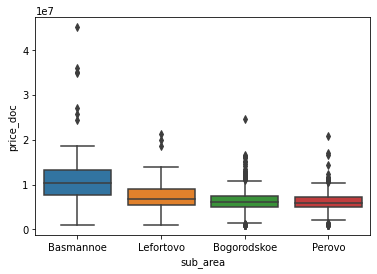

In [43]:

#'Lefortovo''Basmannoe''Bogorodskoe'Perovo

b=data[(data.sub_area=='Perovo') | (data.sub_area=='Lefortovo') | (data.sub_area=='Basmannoe')
             | (data.sub_area=='Bogorodskoe')]
ax=sns.boxplot(x='sub_area', y='price_doc', data=b)

In [66]:
#2.12
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
#poly_features.shape
np.mean(poly_features,axis=0).argmax()


6

In [81]:
datetime_vals = pd.to_datetime(vis_data.ticket_issued_date.dropna())
(datetime_vals.dt.weekday>4).sum()

1620

In [89]:
data.ecology.unique()
ecology_dict={'excellent':4,'good':3,'satisfactory':2,'poor':1,'no data':0}
data.ecology = data.ecology.replace(to_replace=ecology_dict)
data.ecology.mean()

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [92]:
pd.get_dummies(data.sub_area)


,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30465,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


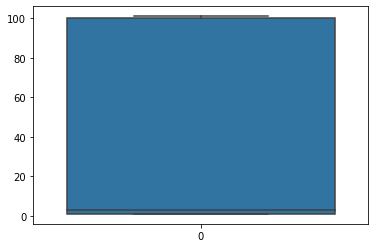

In [2]:
l=[1, 39, 2, 1, 101, 2, 1, 100, 1, 3, 101, 1, 3, 100, 101, 100, 100]
ax=sns.boxplot(data=l)

In [4]:
balance=vis_data.balance_due.dropna()
balance

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [7]:
q1,q3=np.percentile(balance,[25,75])
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
print(lower_bound, upper_bound )

-457.5 762.5


In [11]:
new=balance[((balance<=upper_bound) & (balance>=lower_bound))]
np.max(new)-np.min(new)

1201.3